In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import threadpool_info
from keras.utils import to_categorical

SEED = 928369

In [2]:
!curl  https://raw.githubusercontent.com/americanas-tech/b2w-reviews01/main/B2W-Reviews01.csv --output 'B2W-Reviews01.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 47.1M  100 47.1M    0     0  56.1M      0 --:--:-- --:--:-- --:--:-- 56.0M


In [3]:
B2WReviews01 = pd.read_csv("B2W-Reviews01.csv")
B2WReviews01.head()

<ipython-input-3-dd84bc407041>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  B2WReviews01 = pd.read_csv("B2W-Reviews01.csv")


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [4]:
B2WReviews01.describe()

,overall_rating,reviewer_birth_year
count,132373.000000,126389.000000
mean,3.492004,1977.495898
std,1.530289,21.895265
min,1.000000,59.000000
25%,2.000000,1969.000000
50%,4.000000,1980.000000
75%,5.000000,1987.000000
max,5.000000,2018.000000


In [5]:
B2WReviews01["review_title"]

0                                      Bom
1         Preço imbatível, ótima qualidade
2             ATENDE TODAS AS EXPECTATIVA.
3               presente mais que desejado
4                   Sem duvidas, excelente
                        ...               
132368                      Ótimo produto!
132369                         Sensacional
132370                       Ótimo produto
132371                O produto não é bom.
132372                Produto não entregue
Name: review_title, Length: 132373, dtype: object

In [6]:
B2WReviews01 = B2WReviews01[['review_text', 'overall_rating']]
display(B2WReviews01)

,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5
...,...,...
132368,"Vale muito, estou usando no controle do Xbox e...",5
132369,"Prático e barato, super indico o produto para ...",5
132370,Chegou antes do prazo previsto e corresponde a...,4
132371,"Material fraco, poderia ser melhor. Ficou deve...",1


In [7]:
df = pd.DataFrame(B2WReviews01)

# Selecionar as colunas desejadas
B2WReviews01 = df[['review_text', 'overall_rating']]

# Exibir o DataFrame resultante
display(B2WReviews01)


,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5
...,...,...
132368,"Vale muito, estou usando no controle do Xbox e...",5
132369,"Prático e barato, super indico o produto para ...",5
132370,Chegou antes do prazo previsto e corresponde a...,4
132371,"Material fraco, poderia ser melhor. Ficou deve...",1


In [9]:
treinamento, temp = train_test_split(df, test_size=0.61, random_state=42)  # Ajuste o tamanho do treinamento conforme necessário

# Em seguida, divida o restante em validação e teste
valid, teste = train_test_split(temp, test_size= 20/25, random_state=42)  # Ajuste o tamanho do teste conforme necessário

# Salve os conjuntos de dados em arquivos CSV
treinamento.to_csv('treinamento.csv')
valid.to_csv('validacao.csv')
teste.to_csv('teste.csv')

print("Tamanho do conjunto de treinamento:", len(treinamento))
print("Tamanho do conjunto de validação:", len(valid))
print("Tamanho do conjunto de teste:", len(teste))


Tamanho do conjunto de treinamento: 51625
Tamanho do conjunto de validação: 16149
Tamanho do conjunto de teste: 64599


In [11]:
treinamento['review_text'] = treinamento['review_text'].fillna('')
treinamento['review_text'] = treinamento['review_text'].astype(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(treinamento['review_text'])
vocab_size = len(tokenizer.word_index)


In [12]:
tammax = treinamento['review_text'].apply(lambda x: len(str(x).split())).max()

print("Tamanho máximo de sequência:", tammax)
print("Tamanho do vocabulário:", vocab_size)

Tamanho máximo de sequência: 696
Tamanho do vocabulário: 31970


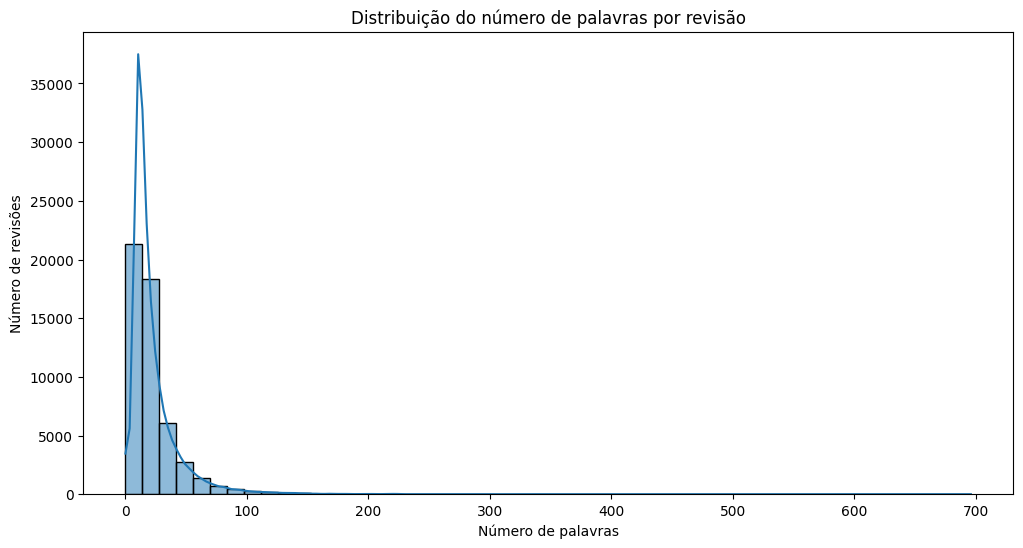

In [13]:
treinamento['num_words'] =treinamento['review_text'].apply(lambda x: len(str(x).split()))

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(treinamento['num_words'], bins=50, kde=True)
plt.title('Distribuição do número de palavras por revisão')
plt.xlabel('Número de palavras')
plt.ylabel('Número de revisões')
plt.show()


In [ ]:
tammax = 696
batch_size = 32
vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size)
treinamento['review_text'] = treinamento['review_text'].astype(str)
tokenizer.fit_on_texts(treinamento['review_text'])
vocab_size = len(tokenizer.word_index)

train_sequences = tokenizer.texts_to_sequences(treinamento['review_text'])

valid['review_text'] = valid['review_text'].astype(str)
valid_sequences = tokenizer.texts_to_sequences(valid['review_text'])

X_treinamento = pad_sequences(train_sequences, maxlen=tammax)
X_valid = pad_sequences(valid_sequences, maxlen=tammax)

y_train = to_categorical(treinamento['overall_rating'] - 1, 5)
y_valid = to_categorical(valid['overall_rating'] - 1, 5)

def create_model(bidirectional=False, dropout_rate=0.0):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=tammax))

    if bidirectional:
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
    else:
        model.add(LSTM(64, return_sequences=True))

    model.add(LSTM(64))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

history_list = []

for bidir in [False, True]:
    for dropout_rate in [0.0, 0.25, 0.5]:
        model = create_model(bidirectional=bidir, dropout_rate=dropout_rate)

        # Sumário do Modelo
        print("Model Summary for bidirectional={}, dropout_rate={}".format(bidir, dropout_rate))
        model.summary()
        print("\n\n")

        # Plotagem do Modelo
        tf.keras.utils.plot_model(
            model,
            to_file='model_{}_{}.png'.format(bidir, dropout_rate),
            show_shapes=True,
            show_dtype=True,
            show_layer_names=True,
            rankdir='LR',
            expand_nested=True,
            dpi=96,
            show_layer_activations=True,
            show_trainable=True
        )

        checkpoint = ModelCheckpoint('best_model_{}_{}.h5'.format(bidir, dropout_rate), monitor='val_loss', verbose=1, save_best_only=True, mode='min')

        early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min')

        history = model.fit(X_treinamento, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=batch_size, callbacks=[checkpoint, early_stopping])

        history_list.append((bidir, dropout_rate, history))


Model Summary for bidirectional=False, dropout_rate=0.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 696, 128)          4092160   
                                                                 
 lstm_2 (LSTM)               (None, 696, 64)           49408     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 4174917 (15.93 MB)
Trainable params: 4174917 (15.93 MB)
Non-trainable params: 0 (0.00 Byte)
________________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 171/1614 [==>...........................] - ETA: 26:42 - loss: 0.8612 - accuracy: 0.6235

In [14]:
tammax = 696
batch_size = 32
vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size)
treinamento['review_text'] = treinamento['review_text'].astype(str)
tokenizer.fit_on_texts(treinamento['review_text'])
vocab_size = len(tokenizer.word_index)
train_sequences = tokenizer.texts_to_sequences(treinamento['review_text'])
valid['review_text'] = valid['review_text'].astype(str)
valid_sequences = tokenizer.texts_to_sequences(valid['review_text'])

X_treinamento = pad_sequences(train_sequences, maxlen=tammax)
X_valid = pad_sequences(valid_sequences, maxlen=tammax)

y_train = to_categorical(treinamento['overall_rating'] - 1, 5)
y_valid = to_categorical(treinamento['overall_rating'] - 1, 5)


def create_model(bidirectional=False, dropout_rate=0.0):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=tammax))

    if bidirectional:
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
    else:
        model.add(LSTM(64, return_sequences=True))

    model.add(LSTM(64))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

history_list = []

for bidir in [False, True]:
    for dropout_rate in [0.0, 0.25, 0.5]:
        model = create_model(bidirectional=bidir, dropout_rate=dropout_rate)
        # Sumário do Modelo
        print("Model Summary for bidirectional={}, dropout_rate={}".format(bidir, dropout_rate))
        model.summary()
        print("\n\n")

        # Plotagem do Modelo
        tf.keras.utils.plot_model(
            model,
            to_file='model_{}_{}.png'.format(bidir, dropout_rate),
            show_shapes=True,
            show_dtype=True,
            show_layer_names=True,
            rankdir='LR',
            expand_nested=True,
            dpi=96,
            show_layer_activations=True,
            show_trainable=True
        )

        checkpoint = ModelCheckpoint('best_model_{}_{}.h5'.format(bidir, dropout_rate), monitor='val_loss', verbose=1, save_best_only=True, mode='min')

        early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min')

        history = model.fit(X_treinamento, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=batch_size, callbacks=[checkpoint, early_stopping])
        history_list.append((bidir, dropout_rate, history))

Model Summary for bidirectional=False, dropout_rate=0.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 696, 128)          4092160   
                                                                 
 lstm (LSTM)                 (None, 696, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 4174917 (15.93 MB)
Trainable params: 4174917 (15.93 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________

ValueError: ignored

In [ ]:
sns.set()

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

best_global_loss = np.inf
best_global_model = ""

for bidir, dropout_rate, history in history_list:
    direction = 'Bidirectional' if bidir else 'Unidirectional'
    title = f'{direction} LSTM with {dropout_rate*100}% Dropout'

    # Encontrar a melhor época para este modelo específico
    best_epoch = np.argmin(history.history['val_loss']) + 1  # +1 porque as listas em Python são baseadas em 0
    best_loss = history.history['val_loss'][best_epoch - 1]  # -1 porque as listas em Python são baseadas em 0

    print(f"Para o modelo {title}:")
    print(f"    Melhor época: {best_epoch}")
    print(f"    Perda de validação na melhor época: {best_loss}")
    print("--------------------------------------")
 # Rastrear o melhor modelo global
    if best_loss < best_global_loss:
        best_global_loss = best_loss
        best_global_model = title + f" (Época: {best_epoch})"

    plot_history(history, title)

In [ ]:
# Pré-processamento de texto
tokenizer = Tokenizer(num_words=10000)  # Ajuste o número máximo de palavras conforme necessário
tokenizer.fit_on_texts(train_data['text'])

X_train = tokenizer.texts_to_sequences(train_data['text'])
X_validation = tokenizer.texts_to_sequences(validation_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

max_sequence_length = 100  # Defina o comprimento máximo da sequência conforme necessário
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_validation = pad_sequences(X_validation, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

y_train = train_data['sentiment']
y_validation = validation_data['sentiment']
y_test = test_data['sentiment']

# Defina o modelo de rede neural
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Experimente também com GRU
model.add(Dropout(0.5))  # Ajuste a taxa de dropout conforme necessário
model.add(Dense(1, activation='sigmoid'))

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

history = model.fit(
    X_train, y_train,
    epochs=20,  # Ajuste o número de épocas conforme necessário
    batch_size=32,  # Ajuste o tamanho do lote conforme necessário
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping, model_checkpoint]
)

# Avaliação do modelo no conjunto de teste
model.load_weights('best_model.h5')
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
import pandas as pd
import spacy
url = '	https://github.com/b2wdigital/b2w-reviews01W'
# Carregue os dados de um arquivo CSV
data = pd.read_csv("ttps://github.com/b2wdigital/b2w-reviews01")  # Substitua "seuarquivo.csv" pelo nome do seu arquivo CSV

# Filtre os dados de acordo com os critérios especificados (exemplo: rótulo entre 0 e 5)
data = data[(data['rotulo'] >= 0) & (data['rotulo'] <= 5)]

# Tokenize e vetorize o texto usando spaCy
nlp = spacy.load("pt_core_news_sm")  # Carregue o modelo de língua em português do spaCy

# Função para tokenizar e vetorizar o texto
def tokenize_and_vectorize(text):
    doc = nlp(text)
    # Aqui, você pode personalizar como deseja vetorizar o texto usando as propriedades do spaCy
    # Por exemplo, você pode usar o vetor médio das palavras no texto
    vector = doc.vector
    return vector

# Aplique a função de tokenização e vetorização aos dados
data['vetor_texto'] = data['texto'].apply(tokenize_and_vectorize)

# Agora, seu DataFrame 'data' deve conter uma coluna 'vetor_texto' com os vetores de texto
